In [1]:
from IPython.display import display, HTML

display(
    HTML("""
<style>
div.container{width:80% !important;}
div.prompt {min-width:70px;}
div#toc-header{margin-top:150px;}
span.toc-item-num{display:none;}
div.CodeMirror {font-family:Consolas}
div.input {font-family:Consolas}
</style>
"""))

In [2]:
import numpy as np
import pandas as pd
import sys
from tensorflow.keras import utils  # utils.to_categorical
from tensorflow.keras.models import Sequential    # 모델 생성
from tensorflow.keras.layers import Dense, Input  # 모델에 layer 쌓기
import matplotlib.pyplot as plt

# 로지스틱회귀분석(이진분류)
## 1. 데이터셋 생성 & 전처리

In [3]:
df = pd.read_csv('data/pima-indians-diabetes.csv', comment='#', header=None)
df.info(), df.values[:2]
# 결측치가 없으므로, csv 파일을 바로 넘파이 배열로 읽어들일 예정

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       768 non-null    int64  
 1   1       768 non-null    int64  
 2   2       768 non-null    int64  
 3   3       768 non-null    int64  
 4   4       768 non-null    int64  
 5   5       768 non-null    float64
 6   6       768 non-null    float64
 7   7       768 non-null    int64  
 8   8       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


(None,
 array([[  6.   , 148.   ,  72.   ,  35.   ,   0.   ,  33.6  ,   0.627,
          50.   ,   1.   ],
        [  1.   ,  85.   ,  66.   ,  29.   ,   0.   ,  26.6  ,   0.351,
          31.   ,   0.   ]]))

In [4]:
# np.set_printoptions(threshold=sys.maxsize)

In [5]:
# 1. 임신횟수
# 2. 2시간내 포도당 농도
# 3. 혈압
# 4. 피부접힘 두께
# 5. 인슐린수치
# 6. BMI체질량지수
# 7. 가족력
# 8. 나이
# 9. 당뇨병발병여부

In [6]:
# csv파일을 numpy배열로 읽어오기 np.loadtxt(), np.genfromtxt()  '#'이 있는 행은 제외하여 읽어옴
dataset = np.loadtxt('data/pima-indians-diabetes.csv', delimiter=',',  # ','를 기준으로 분리
                     )
dataset.shape

(768, 9)

In [7]:
# 학습데이터셋(학습용 데이터:train dataset) : 모델 학습 시 사용
X_train = dataset[:700, :-1]  # 독립변수
y_train = dataset[:700,  -1]  # 종속변수
# 테스트데이터셋(시험용 데이터:test dataset) : 모델 평가 시 사용
X_test = dataset[700:, :-1]
y_test = dataset[700:,  -1]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((700, 8), (700,), (68, 8), (68,))

## 2. 모델 구성

In [8]:
model = Sequential()
model.add(Input(shape=(8, )))                    # 독립변수 8개 : 입력, 종속변수 1개 : 출력 
model.add(Dense(units=12, activation='relu'))    # hidden layer  # units : 출력갯수
model.add(Dense(units=8, activation='relu'))     # hidden layer  # units : 출력갯수
model.add(Dense(units=1,  activation='sigmoid')) # 최종 출력층
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


## 3. 학습과정 설정

In [9]:
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

## 4. 학습

In [10]:
hist = model.fit(X_train, y_train,  # 훈련(학습)데이터
                 epochs=200,        # 300번 학습
                 # batch_size=350,  # 350개씩 나눠서
                 # validation_split=0.2,  # 검증데이터 비율(훈련데이터셋 중 20%를 검증용 데이터로)
                 verbose=2
                )

Epoch 1/200
22/22 - 1s - loss: 7.5646 - binary_accuracy: 0.4429 - 800ms/epoch - 36ms/step
Epoch 2/200
22/22 - 0s - loss: 4.6644 - binary_accuracy: 0.4314 - 48ms/epoch - 2ms/step
Epoch 3/200
22/22 - 0s - loss: 2.9515 - binary_accuracy: 0.4457 - 30ms/epoch - 1ms/step
Epoch 4/200
22/22 - 0s - loss: 2.0034 - binary_accuracy: 0.4414 - 27ms/epoch - 1ms/step
Epoch 5/200
22/22 - 0s - loss: 1.4612 - binary_accuracy: 0.4557 - 27ms/epoch - 1ms/step
Epoch 6/200
22/22 - 0s - loss: 1.1295 - binary_accuracy: 0.4500 - 30ms/epoch - 1ms/step
Epoch 7/200
22/22 - 0s - loss: 0.9146 - binary_accuracy: 0.4429 - 29ms/epoch - 1ms/step
Epoch 8/200
22/22 - 0s - loss: 0.7941 - binary_accuracy: 0.4386 - 28ms/epoch - 1ms/step
Epoch 9/200
22/22 - 0s - loss: 0.7452 - binary_accuracy: 0.4429 - 28ms/epoch - 1ms/step
Epoch 10/200
22/22 - 0s - loss: 0.7076 - binary_accuracy: 0.4914 - 26ms/epoch - 1ms/step
Epoch 11/200
22/22 - 0s - loss: 0.6877 - binary_accuracy: 0.5686 - 27ms/epoch - 1ms/step
Epoch 12/200
22/22 - 0s - lo

Epoch 93/200
22/22 - 0s - loss: 0.5480 - binary_accuracy: 0.7314 - 31ms/epoch - 1ms/step
Epoch 94/200
22/22 - 0s - loss: 0.5485 - binary_accuracy: 0.7271 - 15ms/epoch - 699us/step
Epoch 95/200
22/22 - 0s - loss: 0.5468 - binary_accuracy: 0.7343 - 33ms/epoch - 2ms/step
Epoch 96/200
22/22 - 0s - loss: 0.5535 - binary_accuracy: 0.7129 - 31ms/epoch - 1ms/step
Epoch 97/200
22/22 - 0s - loss: 0.5492 - binary_accuracy: 0.7300 - 17ms/epoch - 792us/step
Epoch 98/200
22/22 - 0s - loss: 0.5477 - binary_accuracy: 0.7371 - 35ms/epoch - 2ms/step
Epoch 99/200
22/22 - 0s - loss: 0.5469 - binary_accuracy: 0.7257 - 25ms/epoch - 1ms/step
Epoch 100/200
22/22 - 0s - loss: 0.5476 - binary_accuracy: 0.7214 - 18ms/epoch - 839us/step
Epoch 101/200
22/22 - 0s - loss: 0.5418 - binary_accuracy: 0.7314 - 33ms/epoch - 2ms/step
Epoch 102/200
22/22 - 0s - loss: 0.5445 - binary_accuracy: 0.7257 - 15ms/epoch - 679us/step
Epoch 103/200
22/22 - 0s - loss: 0.5444 - binary_accuracy: 0.7257 - 20ms/epoch - 914us/step
Epoch 1

Epoch 184/200
22/22 - 0s - loss: 0.5099 - binary_accuracy: 0.7471 - 32ms/epoch - 1ms/step
Epoch 185/200
22/22 - 0s - loss: 0.5058 - binary_accuracy: 0.7500 - 33ms/epoch - 1ms/step
Epoch 186/200
22/22 - 0s - loss: 0.5078 - binary_accuracy: 0.7471 - 24ms/epoch - 1ms/step
Epoch 187/200
22/22 - 0s - loss: 0.5078 - binary_accuracy: 0.7500 - 21ms/epoch - 942us/step
Epoch 188/200
22/22 - 0s - loss: 0.5107 - binary_accuracy: 0.7414 - 33ms/epoch - 2ms/step
Epoch 189/200
22/22 - 0s - loss: 0.5073 - binary_accuracy: 0.7500 - 30ms/epoch - 1ms/step
Epoch 190/200
22/22 - 0s - loss: 0.5060 - binary_accuracy: 0.7429 - 18ms/epoch - 839us/step
Epoch 191/200
22/22 - 0s - loss: 0.5082 - binary_accuracy: 0.7486 - 34ms/epoch - 2ms/step
Epoch 192/200
22/22 - 0s - loss: 0.5082 - binary_accuracy: 0.7486 - 28ms/epoch - 1ms/step
Epoch 193/200
22/22 - 0s - loss: 0.5110 - binary_accuracy: 0.7529 - 20ms/epoch - 888us/step
Epoch 194/200
22/22 - 0s - loss: 0.5068 - binary_accuracy: 0.7429 - 32ms/epoch - 1ms/step
Epoc

## 5. 모델 평가하기(학습과정 보기 및 평가)

In [11]:
hist.history.keys()

dict_keys(['loss', 'binary_accuracy'])

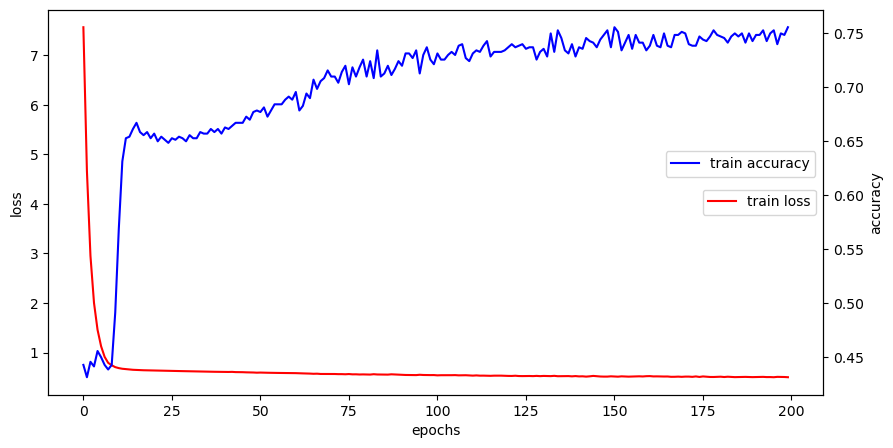

In [12]:
# 학습과정 보기(validation dataset 없는 경우)
fig, loss_ax = plt.subplots(figsize=(10, 5))
loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['binary_accuracy'], 'b', label='train accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend(bbox_to_anchor=(0.999, 0.65))
plt.show()

In [13]:
# 모델 평가하기(X)
model.evaluate(X_train, y_train)

22/22 [==============================] - 0s 1ms/step - loss: 0.5059 - binary_accuracy: 0.7543


[0.5058916807174683, 0.7542856931686401]

In [14]:
# 모델 평가하기(O)
score = model.evaluate(X_test, y_test)
print('loss : {}, accuracy : {}%'.format(score[0], score[1]*100))

3/3 [==============================] - 0s 2ms/step - loss: 0.6702 - binary_accuracy: 0.6765
loss : 0.6701579093933105, accuracy : 67.64705777168274%


## 6. 모델 사용하기

In [15]:
X_train[0], y_train[10]

(array([  6.   , 148.   ,  72.   ,  35.   ,   0.   ,  33.6  ,   0.627,
         50.   ]),
 0.0)

In [16]:
model.predict([[6, 148, 72, 35, 0, 33.6, 0.6, 50]])

1/1 [==============================] - 0s 127ms/step


array([[0.58471495]], dtype=float32)

In [17]:
model.predict([[6, 148, 72, 35, 0, 33.6, 0.6, 50]]) >= 0.5

1/1 [==============================] - 0s 41ms/step


array([[ True]])

In [18]:
(model.predict([[6, 148, 72, 35, 0, 33.6, 0.6, 50],
               [6, 148, 72, 35, 0, 33.6, 0.6, 45]]) >= 0.5).astype(int)

1/1 [==============================] - 0s 44ms/step


array([[1],
       [1]])

In [19]:
model.predict([[6, 148, 72, 35, 0, 33.6, 0.6, 50]]).round()

1/1 [==============================] - 0s 40ms/step


array([[1.]], dtype=float32)

## 7. 교차표
 - 테스트 데이터셋의 실제값(y_test)과 예측값

In [20]:
y_test

array([0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0.])

In [21]:
y_hat = (model.predict(X_test) >= 0.5).astype(float)  # X_test : 2차원 배열
cnt1 = 0
cnt2 = 0
cnt3 = 0
cnt4 = 0
# y_hat.shape : 2차원, y_test.shape : 1차원
y_hat.reshape(-1)   # 1차원으로
y_test.reshape(-1)  # 1차원으로
for h, y in zip(y_hat.reshape(-1), y_test.reshape(-1)):
    # print(h, y)
    if h == 1.0 and y == 1.0:
        cnt1 += 1
    elif y == 1.0 and h == 0.0:
        cnt2 += 1
    elif y == 0.0 and h == 1.0:
        cnt3 += 1
    else:
        cnt4 += 1
print(cnt1, cnt2)
print(cnt3, cnt4)

3/3 [==============================] - 0s 2ms/step
8 19
3 38


In [22]:
# 교차표를 만드는 함수
#                  ┌ 1차원 실제값
ctab = pd.crosstab(y_test, y_hat.reshape(-1))
#                          └ 2차원->1차원 예측값
ctab.index.name   = '실제값'
ctab.columns.name = '예측값'
ctab

예측값,0.0,1.0
실제값,,
0.0,38,3
1.0,19,8


# 분류분석
1. 데이터셋 생성 및 전처리 : 훈련셋600, 검증셋100, 테스트셋68으로 분리, 종속변수의 원핫인코딩
2. 모델 생성(input 8, target 2(0, 1)) : 출력층에서의 활성화함수 'softmax' <br>
 model.summary()에서 파라미터 수 확인
3. 모델 학습과정 설정 : loss='categorical_crossentropy', metrics=['accuracy'] (다중분류)
4. 모델 학습 : validation_data=[X_val, Y_val] 추가해서 학습
5. 모델 학습평가 <br>
 5-1 그래프(hist.history.keys()를 확인 후 4가지) <br>
 5-2 평가(X_test, Y_test) <br>
 5-3 교차표(pd.crosstab 이용)
6. 모델 사용하기 - 예측 <br>
    0      1         <br>
    0.9912 0.00124

In [23]:
import numpy as np
import sys
from tensorflow.keras import utils  # utils.to_categorical
from tensorflow.keras.models import Sequential    # 모델 생성
from tensorflow.keras.layers import Dense, Input  # 모델에 layer 쌓기
import matplotlib.pyplot as plt

## 1.  데이터셋 생성 및 전처리

In [24]:
# 1. 데이터셋 생성 및 전처리 : 훈련셋600, 검증셋100, 테스트셋68으로 분리, 종속변수의 원핫인코딩
dataset = np.loadtxt('data/pima-indians-diabetes.csv', delimiter=',')
dataset.shape

(768, 9)

In [25]:
X_train = dataset[:600, :-1]
Y_train = dataset[:600, -1]
X_val   = dataset[600:700, :-1]
Y_val   = dataset[600:700, -1]
X_test  = dataset[700:, :-1]
Y_test  = dataset[700:, -1]
X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape

((600, 8), (600,), (100, 8), (100,), (68, 8), (68,))

In [26]:
# Y_train = pd.get_dummies(Y_train).values
Y_train = utils.to_categorical(Y_train)  # Y가 숫자라서 바로 to_categorical 사용 가능(문자 시 라벨인코딩 -> 원핫인코딩)
Y_val   = utils.to_categorical(Y_val)
Y_test  = utils.to_categorical(Y_test)
X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape

((600, 8), (600, 2), (100, 8), (100, 2), (68, 8), (68, 2))

## 2. 모델생성(input 8, target 2)

In [27]:
# 2. 모델 생성(input 8, target 2(0, 1)) : 출력층에서의 활성화함수 'softmax'
model = Sequential()
model.add(Input(shape=(8, )))
model.add(Dense(units=12, activation='relu'))
model.add(Dense(units=8,  activation='relu'))
model.add(Dense(units=2,  activation='softmax'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                108       
                                                                 
 dense_4 (Dense)             (None, 8)                 104       
                                                                 
 dense_5 (Dense)             (None, 2)                 18        
                                                                 
Total params: 230
Trainable params: 230
Non-trainable params: 0
_________________________________________________________________
None


## 3. 학습과정 설정

In [28]:
# 3. 모델 학습과정 설정 : loss='categorical_crossentropy', metrics=['accuracy'] (다중분류)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## 4. 모델 학습

In [29]:
# 4. 모델 학습 : validation_data=[X_val, Y_val] 추가해서 학습
hist = model.fit(X_train, Y_train,
                 epochs=300,
                 # batch_size=300,
                 verbose=1,
                 validation_data=[X_val, Y_val])

Epoch 1/300
19/19 [==============================] - 1s 12ms/step - loss: 6.4955 - accuracy: 0.3400 - val_loss: 4.5440 - val_accuracy: 0.3300
Epoch 2/300
19/19 [==============================] - 0s 3ms/step - loss: 2.8224 - accuracy: 0.3900 - val_loss: 1.5198 - val_accuracy: 0.4400
Epoch 3/300
19/19 [==============================] - 0s 3ms/step - loss: 1.3736 - accuracy: 0.5300 - val_loss: 1.3484 - val_accuracy: 0.5600
Epoch 4/300
19/19 [==============================] - 0s 3ms/step - loss: 1.2014 - accuracy: 0.5517 - val_loss: 1.1921 - val_accuracy: 0.4600
Epoch 5/300
19/19 [==============================] - 0s 3ms/step - loss: 1.0970 - accuracy: 0.5550 - val_loss: 1.1075 - val_accuracy: 0.4800
Epoch 6/300
19/19 [==============================] - 0s 3ms/step - loss: 1.0079 - accuracy: 0.5333 - val_loss: 1.0362 - val_accuracy: 0.4800
Epoch 7/300
19/19 [==============================] - 0s 3ms/step - loss: 0.9400 - accuracy: 0.5483 - val_loss: 0.9795 - val_accuracy: 0.5500
Epoch 8/300


Epoch 59/300
19/19 [==============================] - 0s 3ms/step - loss: 0.5725 - accuracy: 0.6933 - val_loss: 0.6093 - val_accuracy: 0.7000
Epoch 60/300
19/19 [==============================] - 0s 3ms/step - loss: 0.5740 - accuracy: 0.6900 - val_loss: 0.6144 - val_accuracy: 0.6900
Epoch 61/300
19/19 [==============================] - 0s 3ms/step - loss: 0.5734 - accuracy: 0.6900 - val_loss: 0.6113 - val_accuracy: 0.7000
Epoch 62/300
19/19 [==============================] - 0s 3ms/step - loss: 0.5702 - accuracy: 0.6933 - val_loss: 0.6190 - val_accuracy: 0.6900
Epoch 63/300
19/19 [==============================] - 0s 3ms/step - loss: 0.5731 - accuracy: 0.6800 - val_loss: 0.6167 - val_accuracy: 0.6700
Epoch 64/300
19/19 [==============================] - 0s 3ms/step - loss: 0.5733 - accuracy: 0.6800 - val_loss: 0.6027 - val_accuracy: 0.7000
Epoch 65/300
19/19 [==============================] - 0s 3ms/step - loss: 0.5701 - accuracy: 0.6867 - val_loss: 0.6029 - val_accuracy: 0.7100
Epoch 

19/19 [==============================] - 0s 3ms/step - loss: 0.5471 - accuracy: 0.7033 - val_loss: 0.5904 - val_accuracy: 0.7300
Epoch 117/300
19/19 [==============================] - 0s 3ms/step - loss: 0.5439 - accuracy: 0.7000 - val_loss: 0.6156 - val_accuracy: 0.6900
Epoch 118/300
19/19 [==============================] - 0s 3ms/step - loss: 0.5579 - accuracy: 0.6967 - val_loss: 0.5920 - val_accuracy: 0.7200
Epoch 119/300
19/19 [==============================] - 0s 3ms/step - loss: 0.5475 - accuracy: 0.7067 - val_loss: 0.5917 - val_accuracy: 0.7100
Epoch 120/300
19/19 [==============================] - 0s 3ms/step - loss: 0.5497 - accuracy: 0.7100 - val_loss: 0.6069 - val_accuracy: 0.7200
Epoch 121/300
19/19 [==============================] - 0s 3ms/step - loss: 0.5530 - accuracy: 0.6933 - val_loss: 0.5857 - val_accuracy: 0.7300
Epoch 122/300
19/19 [==============================] - 0s 3ms/step - loss: 0.5456 - accuracy: 0.7083 - val_loss: 0.5911 - val_accuracy: 0.7300
Epoch 123/300

19/19 [==============================] - 0s 3ms/step - loss: 0.5603 - accuracy: 0.6933 - val_loss: 0.5938 - val_accuracy: 0.7500
Epoch 174/300
19/19 [==============================] - 0s 3ms/step - loss: 0.5530 - accuracy: 0.7000 - val_loss: 0.6064 - val_accuracy: 0.7200
Epoch 175/300
19/19 [==============================] - 0s 3ms/step - loss: 0.5611 - accuracy: 0.6983 - val_loss: 0.6048 - val_accuracy: 0.7200
Epoch 176/300
19/19 [==============================] - 0s 3ms/step - loss: 0.5484 - accuracy: 0.7067 - val_loss: 0.5985 - val_accuracy: 0.7100
Epoch 177/300
19/19 [==============================] - 0s 3ms/step - loss: 0.5443 - accuracy: 0.6967 - val_loss: 0.5807 - val_accuracy: 0.7200
Epoch 178/300
19/19 [==============================] - 0s 3ms/step - loss: 0.5435 - accuracy: 0.6983 - val_loss: 0.5901 - val_accuracy: 0.7100
Epoch 179/300
19/19 [==============================] - 0s 3ms/step - loss: 0.5398 - accuracy: 0.7050 - val_loss: 0.5889 - val_accuracy: 0.7200
Epoch 180/300

19/19 [==============================] - 0s 3ms/step - loss: 0.5314 - accuracy: 0.7067 - val_loss: 0.5755 - val_accuracy: 0.7400
Epoch 231/300
19/19 [==============================] - 0s 3ms/step - loss: 0.5284 - accuracy: 0.7150 - val_loss: 0.5827 - val_accuracy: 0.7600
Epoch 232/300
19/19 [==============================] - 0s 3ms/step - loss: 0.5327 - accuracy: 0.7167 - val_loss: 0.5819 - val_accuracy: 0.7100
Epoch 233/300
19/19 [==============================] - 0s 3ms/step - loss: 0.5275 - accuracy: 0.7217 - val_loss: 0.5816 - val_accuracy: 0.7300
Epoch 234/300
19/19 [==============================] - 0s 3ms/step - loss: 0.5333 - accuracy: 0.7033 - val_loss: 0.5997 - val_accuracy: 0.7000
Epoch 235/300
19/19 [==============================] - 0s 3ms/step - loss: 0.5436 - accuracy: 0.7017 - val_loss: 0.5845 - val_accuracy: 0.7100
Epoch 236/300
19/19 [==============================] - 0s 3ms/step - loss: 0.5338 - accuracy: 0.7150 - val_loss: 0.5912 - val_accuracy: 0.7400
Epoch 237/300

19/19 [==============================] - 0s 3ms/step - loss: 0.5279 - accuracy: 0.7133 - val_loss: 0.5860 - val_accuracy: 0.7400
Epoch 288/300
19/19 [==============================] - 0s 3ms/step - loss: 0.5195 - accuracy: 0.7117 - val_loss: 0.5936 - val_accuracy: 0.7100
Epoch 289/300
19/19 [==============================] - 0s 3ms/step - loss: 0.5260 - accuracy: 0.7083 - val_loss: 0.6129 - val_accuracy: 0.7000
Epoch 290/300
19/19 [==============================] - 0s 3ms/step - loss: 0.5385 - accuracy: 0.6950 - val_loss: 0.5724 - val_accuracy: 0.7300
Epoch 291/300
19/19 [==============================] - 0s 3ms/step - loss: 0.5314 - accuracy: 0.7100 - val_loss: 0.5904 - val_accuracy: 0.7100
Epoch 292/300
19/19 [==============================] - 0s 3ms/step - loss: 0.5307 - accuracy: 0.7100 - val_loss: 0.5792 - val_accuracy: 0.7300
Epoch 293/300
19/19 [==============================] - 0s 3ms/step - loss: 0.5202 - accuracy: 0.7200 - val_loss: 0.5822 - val_accuracy: 0.7400
Epoch 294/300

## 5. 모델 학습 평가

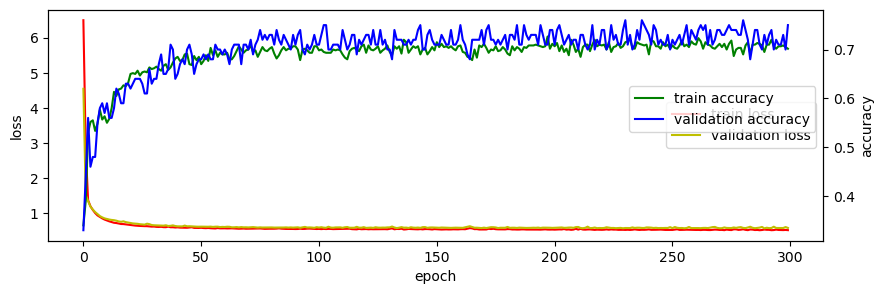

In [30]:
# 5. 모델 학습평가
# 5-1 그래프(hist.history.keys()를 확인 후 4가지)
# 학습과정 표시하기(validation dataset 있는 경우)
hist.history.keys()

fig, loss_ax = plt.subplots(figsize=(10, 3))
loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'y', label= 'validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')


acc_ax = loss_ax.twinx() # loss_ax와 x축을 공유하는 acc_ax 생성
acc_ax.plot(hist.history['accuracy'], 'g', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='validation accuracy')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='center right')
acc_ax.legend(loc='center right')
acc_ax.legend(bbox_to_anchor=(0.999, 0.7))

plt.show()

In [34]:
# 5-2 모델 평가하기(X_test, Y_test)
score = model.evaluate(X_test, Y_test)
print('Test Dataset loss : {}, accuracy(정확도) : {}'.format(score[0], score[1]))

3/3 [==============================] - 0s 3ms/step - loss: 0.6847 - accuracy: 0.6176
Test Dataset loss : 0.6846604347229004, accuracy(정확도) : 0.6176470518112183


In [35]:
score  # loss와 compile에서 metrics=['accuracy']지정으로 accuracy가 저장됨

[0.6846604347229004, 0.6176470518112183]

In [50]:
# 5-3 교차표(pd.crosstab 이용)(원핫인코딩을 이용한 분류분석, 이진분류)
# pd.crosstab(실제값을1차원으로, 예측값을1차원으로)

# crosstab에 들어갈 실제값
all(Y_test.argmax(axis=1) == y_test)

True

In [47]:
# crosstab에 들어갈 예측값
Y_hat = model.predict(X_test)  # predict(2차원배열)
y_hat = Y_hat.argmax(axis=1)
y_hat = np.argmax(Y_hat, axis=1)
y_hat
# a = np.array([1, 2, 3])
# a.mean()
# np.mean(a)

3/3 [==============================] - 0s 2ms/step


array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0], dtype=int64)

In [49]:
ctab = pd.crosstab(y_test, y_hat)
ctab.index.name = '실제'
ctab.columns.name = '예측'
ctab

예측,0,1
실제,,
0.0,36,5
1.0,21,6


## 6. 모델 사용하기

In [53]:
X_test[0]

array([  2.   , 122.   ,  76.   ,  27.   , 200.   ,  35.9  ,   0.483,
        26.   ])

In [57]:
# 6. 모델 사용하기 - 예측
pred = model.predict(np.array([[2., 122.,  76.,  27., 200., 35.9, 0.483, 26.]]))
pred = model.predict([[2., 122.,  76.,  27., 200., 35.9, 0.483, 26.],
                      [2., 122.,  76.,  27., 200., 35.9, 0.483, 26.]])  # predict에는 2차원 배열 데이터로
pred

1/1 [==============================] - 0s 31ms/step


array([[0.7004728, 0.2995272],
       [0.7004728, 0.2995272]], dtype=float32)

In [58]:
pred.argmax(axis=1)
np.argmax(pred, axis=1)

array([0, 0], dtype=int64)